<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.466699,36.688102,34.763765,-37.829074,117.089492,152.121928,-35.032437
1,0.0,1.0,25.127470,94.723578,60.208865,107.959614,298.019527,171.747402,126.272125
2,0.0,2.0,95.297427,27.863240,54.090153,-30.836976,156.413844,196.340791,-39.926947
3,0.0,3.0,51.497895,64.613343,73.168712,-19.532074,179.747875,196.985491,-17.237616
4,0.0,4.0,73.168877,95.460996,96.180400,-20.111309,254.698965,275.817865,-21.118900
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.338729,67.590857,40.947851,-27.266377,176.611061,201.759745,-25.148684
119996,999.0,116.0,70.800647,77.274226,46.863251,-88.420784,116.517340,201.128770,-84.611430
119997,999.0,117.0,65.124964,48.880826,38.027539,-14.604625,147.428705,165.506528,-18.077823
119998,999.0,118.0,56.513612,34.757657,54.965269,8.824139,165.060676,158.168365,6.892311


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    73.466699  36.688102  34.763765  -37.829074  117.089492   
      1.0    25.127470  94.723578  60.208865  107.959614  298.019527   
      2.0    95.297427  27.863240  54.090153  -30.836976  156.413844   
      3.0    51.497895  64.613343  73.168712  -19.532074  179.747875   
      4.0    73.168877  95.460996  96.180400  -20.111309  254.698965   
...                ...        ...        ...         ...         ...   
999.0 115.0  85.338729  67.590857  40.947851  -27.266377  176.611061   
      116.0  70.800647  77.274226  46.863251  -88.420784  116.517340   
      117.0  65.124964  48.880826  38.027539  -14.604625  147.428705   
      118.0  56.513612  34.757657  54.965269    8.824139  165.060676   
      119.0  68.927702  41.764053  45.530030   17.751748  183.973534   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    152.121928  -35.032437  
      1.0    171.747402  126.272125  
      2.0    196.340791  -39.926947  
      3.0    196.985491  -17.237616  
      4.0    275.817865  -21.118900  
...                 ...         ...  
999.0 115.0  201.759745  -25.148684  
      116.0  201.128770  -84.611430  
      117.0  165.506528  -18.077823  
      118.0  158.168365    6.892311  
      119.0  168.419197   15.554337  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    73.466699  36.688102  34.763765  -37.829074  117.089492   
      1.0    25.127470  94.723578  60.208865  107.959614  298.019527   
      2.0    95.297427  27.863240  54.090153  -30.836976  156.413844   
      3.0    51.497895  64.613343  73.168712  -19.532074  179.747875   
      4.0    73.168877  95.460996  96.180400  -20.111309  254.698965   
...                ...        ...        ...         ...         ...   
999.0 115.0  85.338729  67.590857  40.947851  -27.266377  176.611061   
      116.0  70.800647  77.274226  46.863251  -88.420784  116.517340   
      117.0  65.124964  48.880826  38.027539  -14.604625  147.428705   
      118.0  56.513612  34.757657  54.965269    8.824139  165.060676   
      119.0  68.927702  41.764053  45.530030   17.751748  183.973534   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    152.121928  -35.032437  
      1.0    171.747402  126.272125  
      2.0    196.340791  -39.926947  
      3.0    196.985491  -17.237616  
      4.0    275.817865  -21.118900  
...                 ...         ...  
999.0 115.0  201.759745  -25.148684  
      116.0  201.128770  -84.611430  
      117.0  165.506528  -18.077823  
      118.0  158.168365    6.892311  
      119.0  168.419197   15.554337  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.466699,36.688102,34.763765,-37.829074,117.089492,152.121928,-35.032437
1,0.0,1.0,25.127470,94.723578,60.208865,107.959614,298.019527,171.747402,126.272125
2,0.0,2.0,95.297427,27.863240,54.090153,-30.836976,156.413844,196.340791,-39.926947
3,0.0,3.0,51.497895,64.613343,73.168712,-19.532074,179.747875,196.985491,-17.237616
4,0.0,4.0,73.168877,95.460996,96.180400,-20.111309,254.698965,275.817865,-21.118900
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.338729,67.590857,40.947851,-27.266377,176.611061,201.759745,-25.148684
119996,999.0,116.0,70.800647,77.274226,46.863251,-88.420784,116.517340,201.128770,-84.611430
119997,999.0,117.0,65.124964,48.880826,38.027539,-14.604625,147.428705,165.506528,-18.077823
119998,999.0,118.0,56.513612,34.757657,54.965269,8.824139,165.060676,158.168365,6.892311


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    73.466699  36.688102  34.763765  -37.829074  117.089492   
      1.0    25.127470  94.723578  60.208865  107.959614  298.019527   
      2.0    95.297427  27.863240  54.090153  -30.836976  156.413844   
      3.0    51.497895  64.613343  73.168712  -19.532074  179.747875   
      4.0    73.168877  95.460996  96.180400  -20.111309  254.698965   
...                ...        ...        ...         ...         ...   
999.0 115.0  85.338729  67.590857  40.947851  -27.266377  176.611061   
      116.0  70.800647  77.274226  46.863251  -88.420784  116.517340   
      117.0  65.124964  48.880826  38.027539  -14.604625  147.428705   
      118.0  56.513612  34.757657  54.965269    8.824139  165.060676   
      119.0  68.927702  41.764053  45.530030   17.751748  183.973534   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    152.121928  -35.032437  
      1.0    171.747402  126.272125  
      2.0    196.340791  -39.926947  
      3.0    196.985491  -17.237616  
      4.0    275.817865  -21.118900  
...                 ...         ...  
999.0 115.0  201.759745  -25.148684  
      116.0  201.128770  -84.611430  
      117.0  165.506528  -18.077823  
      118.0  158.168365    6.892311  
      119.0  168.419197   15.554337  

[120000 rows x 7 columns]

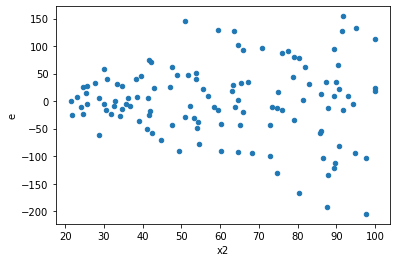

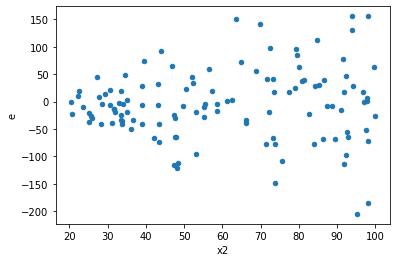

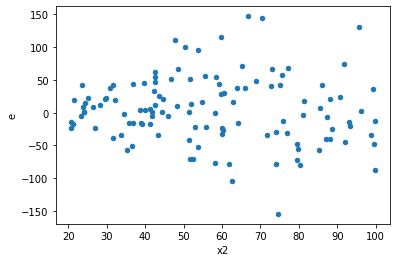

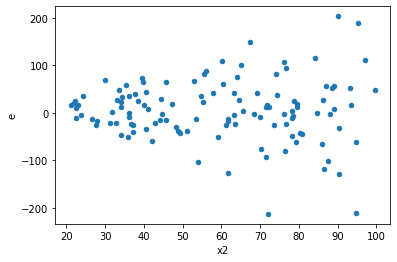

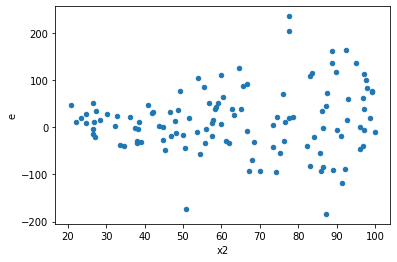

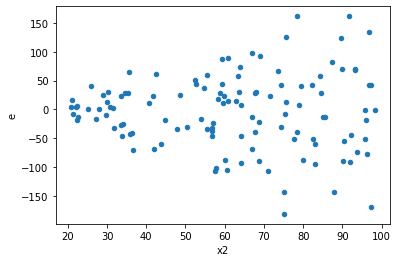

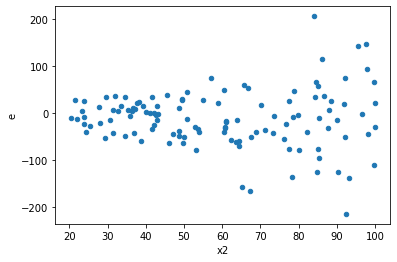

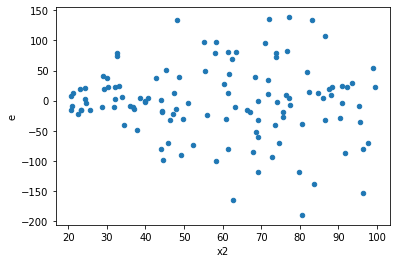

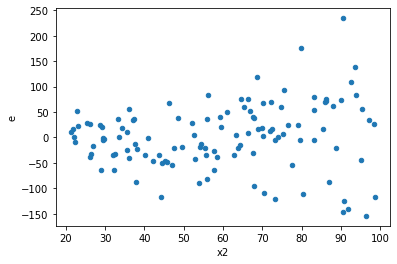

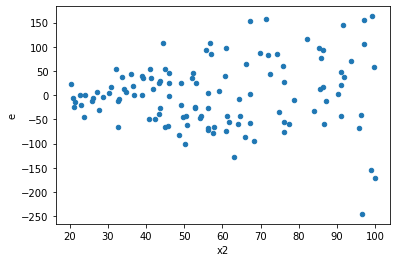

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,82.0,32.0,284781.1305703205,237871.73795035906,3472.940616711226,7433.491810948721,2.140402797323964,0.017733732070609243,0.9911331339646954,0.008866866035304621,Reject005=0 : Heteroscedasticity
3.0,66.0,48.0,86161.76248932582,309622.098470713,1305.48124983827,6450.460384806521,4.941059387567334,5.231691369012026e-08,0.9999999738415432,2.615845684506013e-08,Reject005=0 : Heteroscedasticity
5.0,52.0,62.0,172526.62265151372,411945.6884320674,3317.8196663752638,6644.28529729141,2.0026059175634243,0.009101398140555883,0.9954493009297221,0.0045506990702779415,Reject005=0 : Heteroscedasticity
6.0,54.0,60.0,160182.31047904,297522.95694685366,2966.339082945185,4958.715949114227,1.6716618735950017,0.053449392455135136,0.9732753037724324,0.026724696227567568,Reject005=1 : Homoscedasticity
9.0,59.0,55.0,159230.69374432444,298026.02402618714,2698.8253177004144,5418.654982294312,2.0077827737703973,0.009905351957019137,0.9950473240214904,0.004952675978509569,Reject005=0 : Heteroscedasticity
11.0,58.0,56.0,147357.67233273236,316140.15106019937,2540.649522978144,5645.359840360703,2.2220144058843756,0.003138863929398994,0.9984305680353005,0.001569431964699497,Reject005=0 : Heteroscedasticity
12.0,69.0,45.0,151408.0622596804,125934.86278012031,2194.319742893919,2798.5525062248958,1.2753622234351776,0.3865105292050468,0.8067447353974766,0.1932552646025234,Reject005=1 : Homoscedasticity
14.0,68.0,46.0,208714.48601731018,283710.01101110526,3069.3306767251497,6167.608935024027,2.0094312358695134,0.013246014567455111,0.9933769927162724,0.0066230072837275555,Reject005=0 : Heteroscedasticity
15.0,70.0,44.0,220823.16914584386,251046.9556871011,3154.6167020834837,5705.612629252298,1.8086547964714683,0.036949703204663065,0.9815251483976685,0.018474851602331532,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,82.0,32.0,284781.1305703205,237871.73795035906,3472.940616711226,7433.491810948721,2.140402797323964,0.017733732070609243,Reject005=0 : Heteroscedasticity
1.0,76.0,38.0,282394.1007325633,61131.057847522985,3715.711851744254,1608.7120486190258,0.43294854735946586,0.0019538968430351977,Reject005=0 : Heteroscedasticity
2.0,69.0,45.0,354653.8253774366,92847.57466930377,5139.910512716472,2063.2794370956394,0.4014232216671773,0.0006186859652839541,Reject005=0 : Heteroscedasticity
3.0,66.0,48.0,86161.76248932582,309622.098470713,1305.48124983827,6450.460384806521,4.941059387567334,5.231691369012026e-08,Reject005=0 : Heteroscedasticity
4.0,60.0,54.0,438934.3133948005,143998.22908524453,7315.571889913342,2666.6338719489727,0.3645147518303673,0.00017821232120059351,Reject005=0 : Heteroscedasticity
5.0,52.0,62.0,172526.62265151372,411945.6884320674,3317.8196663752638,6644.28529729141,2.0026059175634243,0.009101398140555883,Reject005=0 : Heteroscedasticity
6.0,54.0,60.0,160182.31047904,297522.95694685366,2966.339082945185,4958.715949114227,1.6716618735950017,0.053449392455135136,Reject005=1 : Homoscedasticity
7.0,55.0,59.0,409004.620643003,137150.46545009266,7436.447648054601,2324.5841601710617,0.31259336045741953,2.3986112617314512e-05,Reject005=0 : Heteroscedasticity
8.0,69.0,45.0,396805.09357891046,125746.74079467777,5750.798457665369,2794.372017659506,0.48591026763158857,0.0067273203756555225,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    603
Reject005=1 : Homoscedasticity      397
Name: Result_test, dtype: int64